In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure
from sklearn import metrics

In [2]:
data = pd.read_csv('Datas/DataTreinamentoDevAcademy/data_2__.csv')
data = data.drop(['index'], axis=1)
#data_test = pd.read_csv('Datas/DataTreinamentoDevAcademy/data_1__test.csv', date_parser = 'data')
data.head()

,data,valor
0,2014-07-18,1.50
1,2014-08-05,83.20
2,2014-08-08,22.50
3,2014-08-11,15.91
4,2014-08-12,0.44


In [3]:
len(data)

1542

In [4]:
data.tail()

,data,valor
1537,2018-10-27,19315.50
1538,2018-10-28,12903.71
1539,2018-10-29,11071.90
1540,2018-10-30,11205.80
1541,2018-10-31,12025.80


In [5]:
data['data'] = data['data'].astype('datetime64[ns]')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1542 entries, 0 to 1541
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   data    1542 non-null   datetime64[ns]
 1   valor   1542 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 24.2 KB


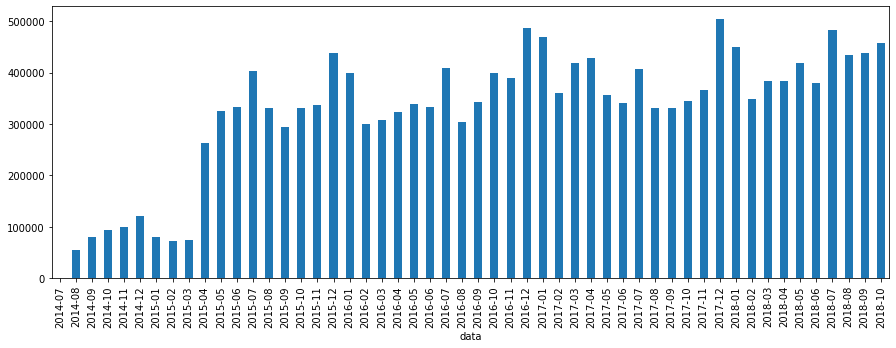

In [6]:
data['valor'].groupby(data['data'].dt.to_period('M')).sum().plot(kind='bar', figsize=(15,5))

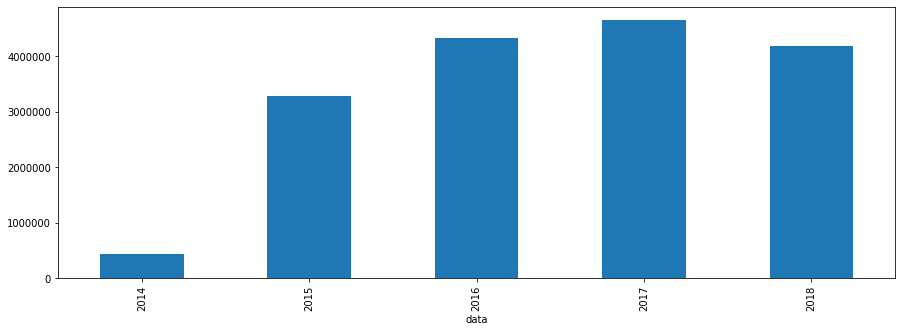

In [7]:
data['valor'].groupby(data['data'].dt.to_period('Y')).sum().plot(kind='bar', figsize=(15,5))

In [8]:
data["Year"] = data.data.apply(lambda x: x.year)
data["Month"] = data.data.apply(lambda x: x.strftime("%B"))
df = data.pivot_table(index="Month",columns="Year",values="valor", aggfunc="sum").fillna(0)
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July',
          'August', 'September', 'October', 'November', 'December']
pt = df.reindex(months)
pt.head(12)

Year,2014,2015,2016,2017,2018
Month,,,,,
January,0.00,80715.76,398732.38,469226.43,449808.06
February,0.00,72224.63,300369.98,360349.55,348243.37
March,0.00,73179.45,307800.64,417884.31,382666.09
April,0.00,263512.38,323850.44,428958.07,383273.38
May,0.00,325193.14,338480.67,355875.02,418669.53
June,0.00,333163.07,332429.23,340212.38,379383.08
July,1.50,402575.47,408854.16,407182.17,482195.78
August,54228.86,331405.31,303855.82,331542.19,434308.16
September,79707.74,294473.47,343189.30,330447.87,438753.21


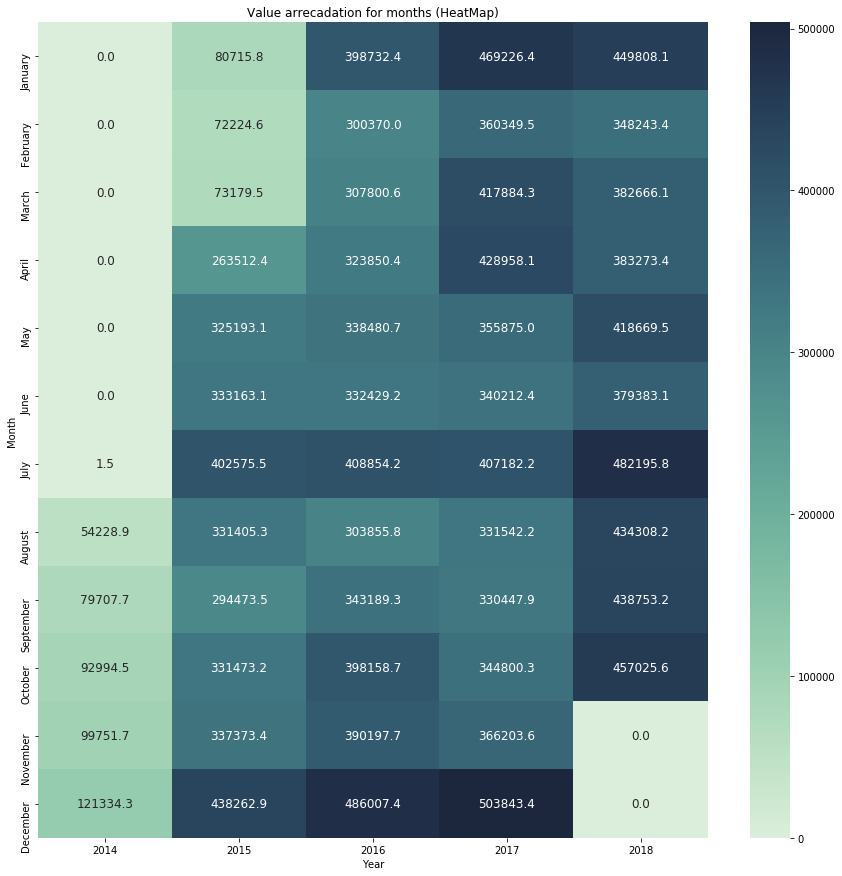

In [9]:
fig= plt.figure(figsize=(15,15), )
ax = plt.axes()
ax.set_title('Value arrecadation for months (HeatMap)')

cmap = sns.cubehelix_palette(rot=-.4, as_cmap=True, light=.9)
cmap.set_under(".5")
sns.heatmap(pt, ax = ax, cmap=cmap, fmt='.1f', mask=pt.isnull(), annot=True, annot_kws={'size':12})

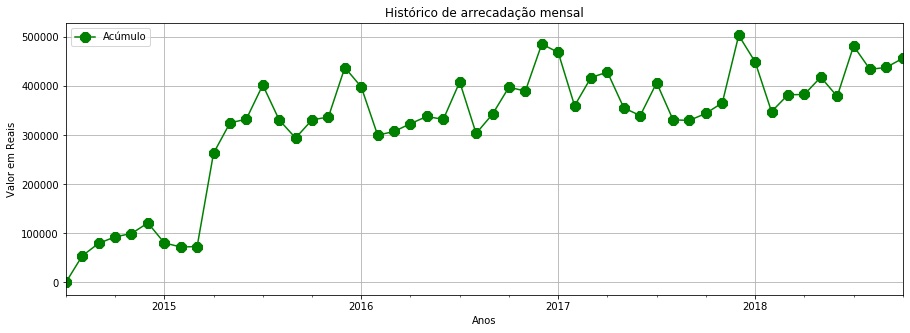

In [10]:
ax = data['valor'].groupby(data['data'].dt.to_period('M')).sum().plot(
    label = 'Acúmulo', marker = "8", markersize =10 ,figsize=(15,5), 
    color = "green", legend = True, title = "Histórico de arrecadação mensal")
ax.set_xlabel('Anos')
ax.set_ylabel('Valor em Reais')
ax.grid()

### date processing

In [11]:
import datetime

# pip install locale
#import locale
# locale.setlocale(locale.LC_ALL, 'pt-BR') # windows
#locale.setlocale(locale.LC_ALL, 'pt_BR.utf8') # linux

In [12]:
data.head()

,data,valor,Year,Month
0,2014-07-18,1.50,2014,July
1,2014-08-05,83.20,2014,August
2,2014-08-08,22.50,2014,August
3,2014-08-11,15.91,2014,August
4,2014-08-12,0.44,2014,August


In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1542 entries, 0 to 1541
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   data    1542 non-null   datetime64[ns]
 1   valor   1542 non-null   float64       
 2   Year    1542 non-null   int64         
 3   Month   1542 non-null   object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 48.3+ KB


In [14]:
data.set_index('data', inplace=True)

In [15]:
data.index

DatetimeIndex(['2014-07-18', '2014-08-05', '2014-08-08', '2014-08-11',
               '2014-08-12', '2014-08-13', '2014-08-14', '2014-08-15',
               '2014-08-16', '2014-08-17',
               ...
               '2018-10-22', '2018-10-23', '2018-10-24', '2018-10-25',
               '2018-10-26', '2018-10-27', '2018-10-28', '2018-10-29',
               '2018-10-30', '2018-10-31'],
              dtype='datetime64[ns]', name='data', length=1542, freq=None)

In [16]:
data.index = pd.to_datetime(data.index)
data.sort_index(inplace=True)
data.head()

,valor,Year,Month
data,,,
2014-07-18,1.50,2014,July
2014-08-05,83.20,2014,August
2014-08-08,22.50,2014,August
2014-08-11,15.91,2014,August
2014-08-12,0.44,2014,August


In [17]:
data['data'] = data.index
data.head()

,valor,Year,Month,data
data,,,,
2014-07-18,1.50,2014,July,2014-07-18
2014-08-05,83.20,2014,August,2014-08-05
2014-08-08,22.50,2014,August,2014-08-08
2014-08-11,15.91,2014,August,2014-08-11
2014-08-12,0.44,2014,August,2014-08-12


In [18]:
data['data'] = pd.to_datetime(data['data'], format = '%d/%b/%y')
data.head(20)
data.tail(10)

,valor,Year,Month,data
data,,,,
2018-10-22,11776.42,2018,October,2018-10-22
2018-10-23,11584.40,2018,October,2018-10-23
2018-10-24,11568.62,2018,October,2018-10-24
2018-10-25,11768.90,2018,October,2018-10-25
2018-10-26,14266.50,2018,October,2018-10-26
2018-10-27,19315.50,2018,October,2018-10-27
2018-10-28,12903.71,2018,October,2018-10-28
2018-10-29,11071.90,2018,October,2018-10-29
2018-10-30,11205.80,2018,October,2018-10-30


In [19]:
y = data.valor
y.index.name = 'days'
y.head()

days
2014-07-18     1.50
2014-08-05    83.20
2014-08-08    22.50
2014-08-11    15.91
2014-08-12     0.44
Name: valor, dtype: float64

In [20]:
plt.rcParams['figure.figsize'] = [12.0 , 8.0]
plt.rcParams['figure.dpi'] = 80
plt.rcParams['savefig.dpi'] = 100

plt.rcParams['font.size'] = 15
plt.rcParams['legend.fontsize'] = 'large'
plt.rcParams['figure.titlesize'] = 'medium'

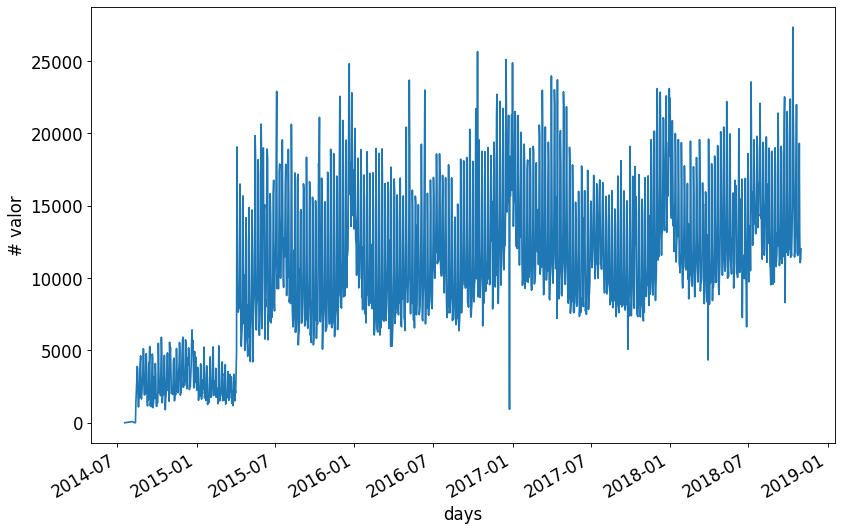

In [21]:
ax = y.plot();
ax.set_ylabel('# valor');

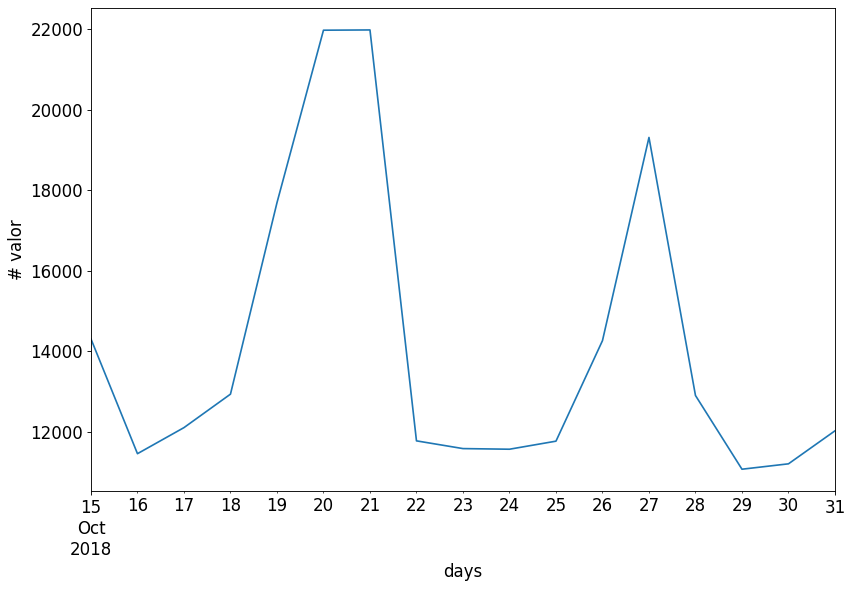

In [22]:
y.loc['2018-10-15':'2018-10-31'].plot();
plt.ylabel('# valor');

In [23]:
class Date_separation_chart():
    def __init__(self, know, unknown, to_predict):
        self.known = known
        self.unknown = unknown
        self.to_predict = to_predict
        
    
    def plot(self):
        fig, ax = plt.subplots();
        self.known.plot(ax=ax, c='c', marker='o', zorder=3);
        self.unknown.plot(ax=ax, c='grey', alpha=0.5);
        self.to_predict.plot(ax=ax, c='r', marker='o', markersize=16,
                    linestyle='');

        ax.legend(['known', 'future', 'value to predict']);
        ax.set_ylabel('# bikes');
 

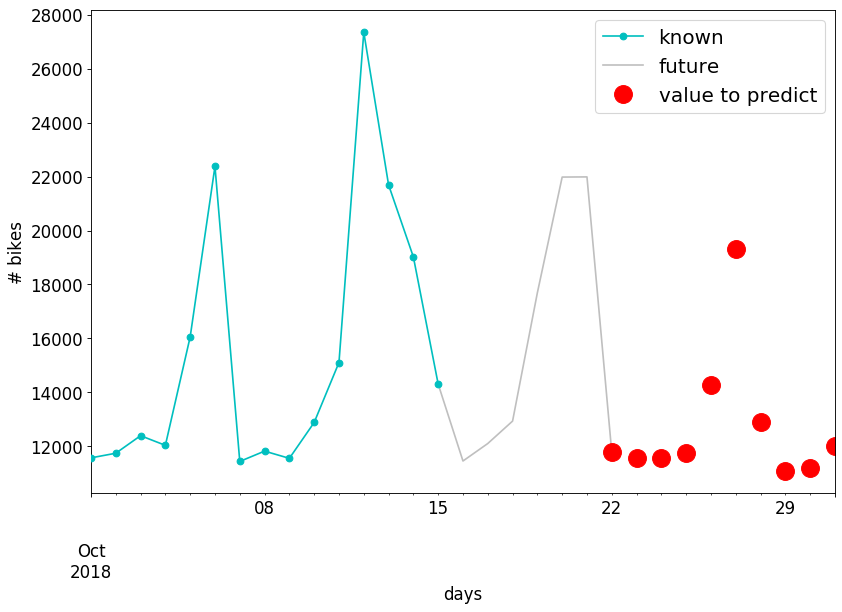

In [24]:
# known = y.loc['2015-04-01':'2017-01-01']
# unknown = y.loc['2017-01-02':'2018-01-01']
# to_predict = y.loc['2018-01-02':'2018-10-31']

known = y.loc['2018-10-01':'2018-10-15']
unknown = y.loc['2018-10-15':'2018-10-22']
to_predict = y.loc['2018-10-22':'2018-10-31']

date_separation_time =  Date_separation_chart(  know=known, 
                                                unknown=unknown, 
                                                to_predict=to_predict)

date_separation_time.plot()

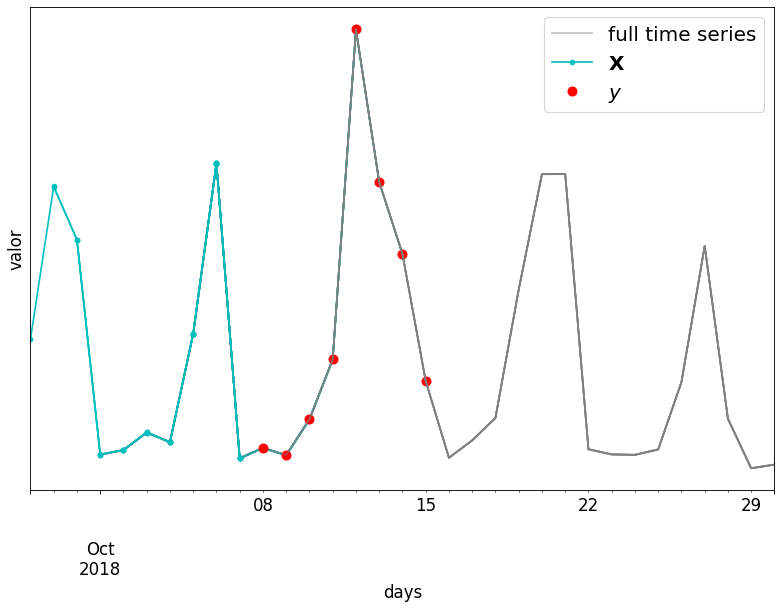

In [25]:
fig, ax = plt.subplots();

# start = np.where(y.index == '2017-05-02 11:00:00')[0][0]
# middle = np.where(y.index == '2017-05-02 12:15:00')[0][0]
# end = np.where(y.index == '2017-05-02 12:30:00')[0][0]

start = np.where(y.index == '2018-10-01')[0][0]
middle = np.where(y.index == '2018-10-15')[0][0]
end = np.where(y.index == '2018-10-31')[0][0]

window = 10

for i in range(8):

    full = y.iloc[start:end]
    train = y.iloc[middle - i - window:middle - i ]
    predict = y.iloc[middle - i:middle - i + 1]

    (full + 2*i).plot(ax=ax, c='grey', alpha=0.5);
    (train + 2*i).plot(ax=ax, c='c', markersize=4,
                       marker='o')
    (predict + 2*i).plot(ax=ax, c='r', markersize=8,
                         marker='o', linestyle='')


ax.get_yaxis().set_ticks([]);
ax.set_ylabel('valor');
ax.legend(['full time series',
           '$\mathbf{X}$',
           '$y$'],
          bbox_to_anchor=(1, 1));

### Filtering by values with minus discrepancy

In [26]:
data = pd.read_csv('Datas/DataTreinamentoDevAcademy/data_2__.csv')
data = data.drop(['index'], axis=1)
#data_test = pd.read_csv('Datas/DataTreinamentoDevAcademy/data_1__test.csv', date_parser = 'data')
data.head()

,data,valor
0,2014-07-18,1.50
1,2014-08-05,83.20
2,2014-08-08,22.50
3,2014-08-11,15.91
4,2014-08-12,0.44


In [27]:
data['data'] = data['data'].astype('datetime64[ns]')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1542 entries, 0 to 1541
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   data    1542 non-null   datetime64[ns]
 1   valor   1542 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 24.2 KB


In [28]:
from datetime import date
data = data[data['data'] > pd.Timestamp(date(2015,3,31))]

In [29]:
data.head()

,data,valor
234,2015-04-01,2059.33
235,2015-04-02,3497.39
236,2015-04-03,4869.60
237,2015-04-04,19071.83
238,2015-04-05,13512.03


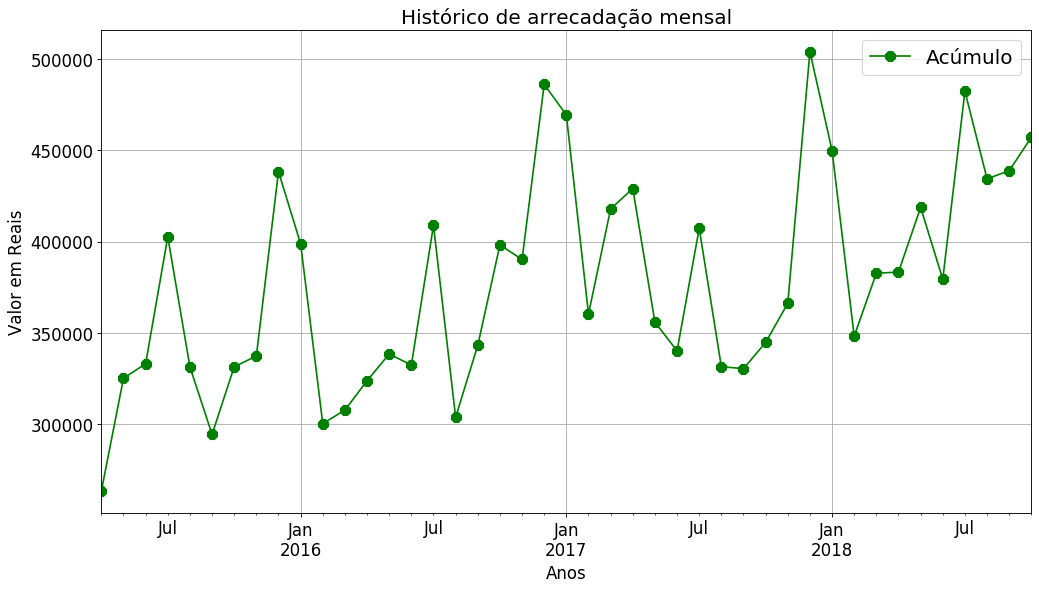

In [30]:
#data['valor'].groupby(data['data'].dt.to_period('M')).sum().plot(figsize=(20,5))
ax = data['valor'].groupby(data['data'].dt.to_period('M')).sum().plot(
    label = 'Acúmulo', marker = "8", markersize =10 ,figsize=(15,8), 
    color = "green", legend = True, title = "Histórico de arrecadação mensal")
ax.set_xlabel('Anos')
ax.set_ylabel('Valor em Reais')
ax.grid()

In [31]:
# df = data.pivot_table(index="Month",columns="Year",values="valor", aggfunc="sum").fillna(0)
# months = ['January', 'February', 'March', 'April', 'May', 'June', 'July',
#          'August', 'September', 'October', 'November', 'December']
#pt = df.reindex(months)
#pt.head(12)

In [32]:
len(data)

1308

#### linear regression with sklearn review 

In [33]:
from sklearn import linear_model

In [34]:
lm = linear_model.LinearRegression()

In [35]:
data['data'] = data['data'].astype('datetime64[ns]')
data.head()

,data,valor
234,2015-04-01,2059.33
235,2015-04-02,3497.39
236,2015-04-03,4869.60
237,2015-04-04,19071.83
238,2015-04-05,13512.03


In [36]:
x = data.index.values
x = np.array(x)
x = x.reshape(-1,1)
x

array([[ 234],
       [ 235],
       [ 236],
       ...,
       [1539],
       [1540],
       [1541]])

In [37]:
y = data['valor']
y = np.array(y)
y = y.reshape(-1,1)
y

array([[ 2059.33],
       [ 3497.39],
       [ 4869.6 ],
       ...,
       [11071.9 ],
       [11205.8 ],
       [12025.8 ]])

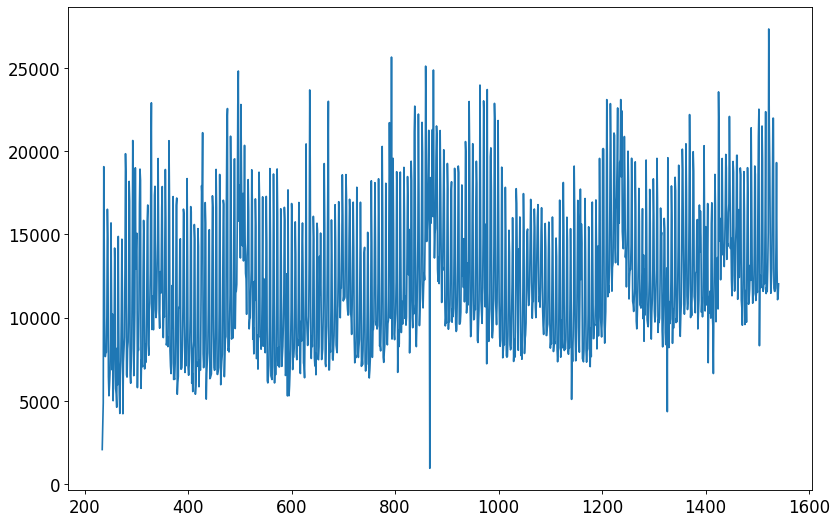

In [38]:
plt.plot(x,y)

In [39]:
model = lm.fit(x,y)

In [40]:
skpred = model.predict(x)
skpred

array([[10638.8589163 ],
       [10641.5550348 ],
       [10644.2511533 ],
       ...,
       [14157.29355618],
       [14159.98967468],
       [14162.68579318]])

In [41]:
lm.score(x,y)

0.055000745783051704

In [42]:
lm.intercept_

array([10007.96718777])

In [43]:
from sklearn.metrics import mean_squared_error

In [44]:
r = mean_squared_error(y,skpred)
r

17806346.807200007

In [45]:
np.sqrt(r)

4219.756723698655

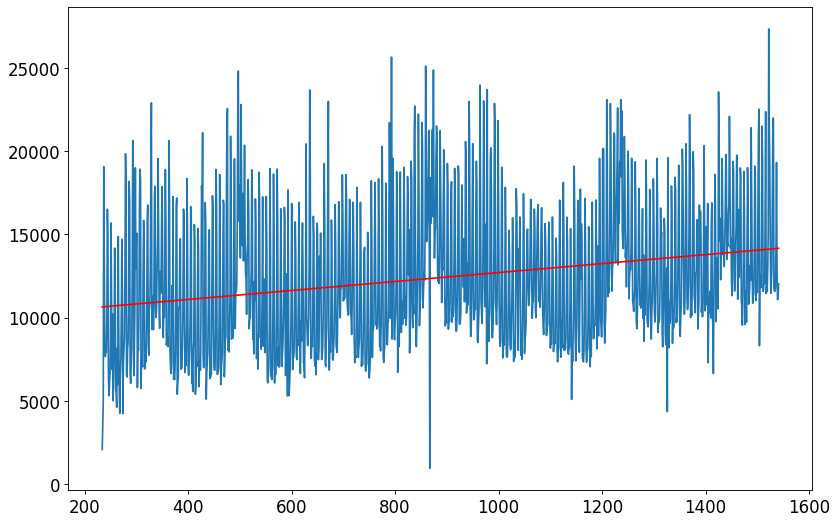

In [46]:
plt.plot(x,y)
plt.plot(x,skpred, color='red')

### Polynomial Features

In [47]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline

In [48]:
model = Pipeline([('poly', PolynomialFeatures(degree=3)),
                   ('linear', LinearRegression(fit_intercept=True, normalize=True))])

In [49]:
model.fit(x,y)


Pipeline(memory=None,
         steps=[('poly',
                 PolynomialFeatures(degree=3, include_bias=True,
                                    interaction_only=False, order='C')),
                ('linear',
                 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                  normalize=True))],
         verbose=False)

In [50]:
skpred = model.predict(x)
skpred

array([[ 9849.25002607],
       [ 9858.74431718],
       [ 9868.21361872],
       ...,
       [14738.4373051 ],
       [14747.00501306],
       [14755.5963278 ]])

In [51]:
r = mean_squared_error(y,skpred)
r

17735511.397979066

In [52]:
np.sqrt(r)

4211.355054846251

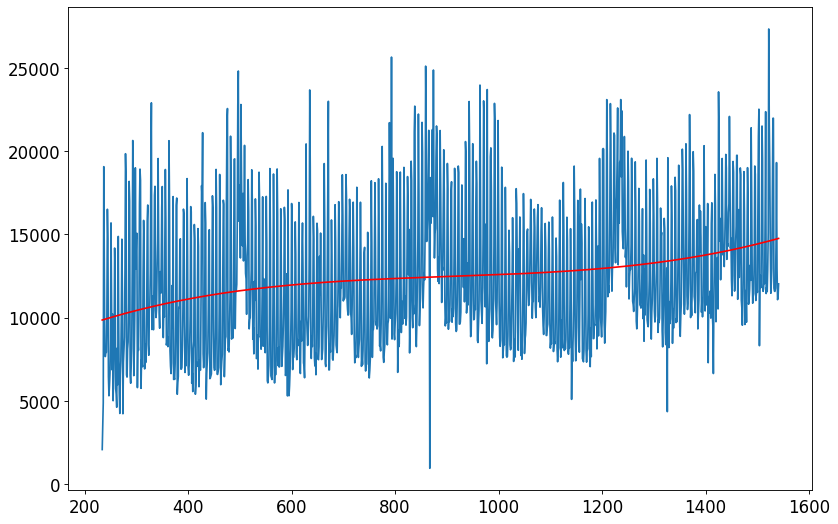

In [53]:
plt.plot(x,y)
plt.plot(x,skpred, color='red')

### Separate training and test for tensorflow

In [54]:
data_training = data.iloc[:1008, :]
data_test = data.iloc[1008:1308, :]

In [55]:
data_training = data_training[['valor']].values
data_test = data_test.iloc[:, 2:3].values

In [56]:
len(data_training),  len(data_test), data_training.shape

(1008, 300, (1008, 1))

In [57]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
data_train_scaled = scaler.fit_transform(np.array(data_training))

In [58]:
previsores = []
preco_real = []
for i in range(20, len(data_training)):
    previsores.append(data_train_scaled[i-20:i, 0])
    preco_real.append(data_train_scaled[i, 0])

In [59]:
previsores, preco_real = np.array(previsores), np.array(preco_real)

In [60]:
dt_values = pd.DataFrame(previsores)
dt_values[20] = pd.DataFrame(preco_real)
dt_values.head()

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
0,0.045465,0.103626,0.159124,0.733525,0.508662,0.286674,0.271613,0.282072,0.281889,0.369900,...,0.556851,0.222724,0.176216,0.200701,0.231074,0.313089,0.596682,0.429633,0.239448,0.374890
1,0.103626,0.159124,0.733525,0.508662,0.286674,0.271613,0.282072,0.281889,0.369900,0.629880,...,0.222724,0.176216,0.200701,0.231074,0.313089,0.596682,0.429633,0.239448,0.374890,0.164307
2,0.159124,0.733525,0.508662,0.286674,0.271613,0.282072,0.281889,0.369900,0.629880,0.556851,...,0.176216,0.200701,0.231074,0.313089,0.596682,0.429633,0.239448,0.374890,0.164307,0.222792
3,0.733525,0.508662,0.286674,0.271613,0.282072,0.281889,0.369900,0.629880,0.556851,0.222724,...,0.200701,0.231074,0.313089,0.596682,0.429633,0.239448,0.374890,0.164307,0.222792,0.306156
4,0.508662,0.286674,0.271613,0.282072,0.281889,0.369900,0.629880,0.556851,0.222724,0.176216,...,0.231074,0.313089,0.596682,0.429633,0.239448,0.374890,0.164307,0.222792,0.306156,0.535516


In [61]:
previsores = np.reshape(previsores, (previsores.shape[0], previsores.shape[1], 1))
previsores.shape

(988, 20, 1)

### separating the data set according to tf.keras doc

In [62]:
from __future__ import absolute_import, division, print_function, unicode_literals
import tensorflow as tf

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd

mpl.rcParams['figure.figsize'] = (15, 10)
mpl.rcParams['axes.grid'] = False

In [63]:
data = pd.read_csv('Datas/DataTreinamentoDevAcademy/data_2__.csv')
data = data.drop(['index'], axis=1)
#data_test = pd.read_csv('Datas/DataTreinamentoDevAcademy/data_1__test.csv', date_parser = 'data')
data.head()

,data,valor
0,2014-07-18,1.50
1,2014-08-05,83.20
2,2014-08-08,22.50
3,2014-08-11,15.91
4,2014-08-12,0.44


In [64]:
# data without the first 233 records (due to discrepancies)
data = data.iloc[234:, :]
data.head()

,data,valor
234,2015-04-01,2059.33
235,2015-04-02,3497.39
236,2015-04-03,4869.60
237,2015-04-04,19071.83
238,2015-04-05,13512.03


In [65]:
data_training = data.iloc[:1008, :]
data_test = data.iloc[1008:1308, :]

In [66]:
# Function responsible by adapt dataset for time series 
# setting history size each value and target size

def univariate_data(dataset, start_index, end_index, history_size, target_size):
    data = []
    labels = []

    start_index = start_index + history_size
    if end_index is None:
        end_index = len(dataset) - target_size

    for i in range(start_index, end_index):
        indices = range(i-history_size, i)

        # Reshape data from (history_size,) to (history_size, 1)
        data.append(np.reshape(dataset[indices], (history_size, 1)))
        labels.append(dataset[i+target_size])
        
    return np.array(data), np.array(labels)

In [67]:
# setting 1200 samples for training and validation dataset and seed random
tf.random.set_seed(13)
TRAIN_SPLIT = 808

In [68]:
uni_data = data['valor']
uni_data.index = data['data']
uni_data.head()

data
2015-04-01     2059.33
2015-04-02     3497.39
2015-04-03     4869.60
2015-04-04    19071.83
2015-04-05    13512.03
Name: valor, dtype: float64

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f792a5cafd0>],
      dtype=object)

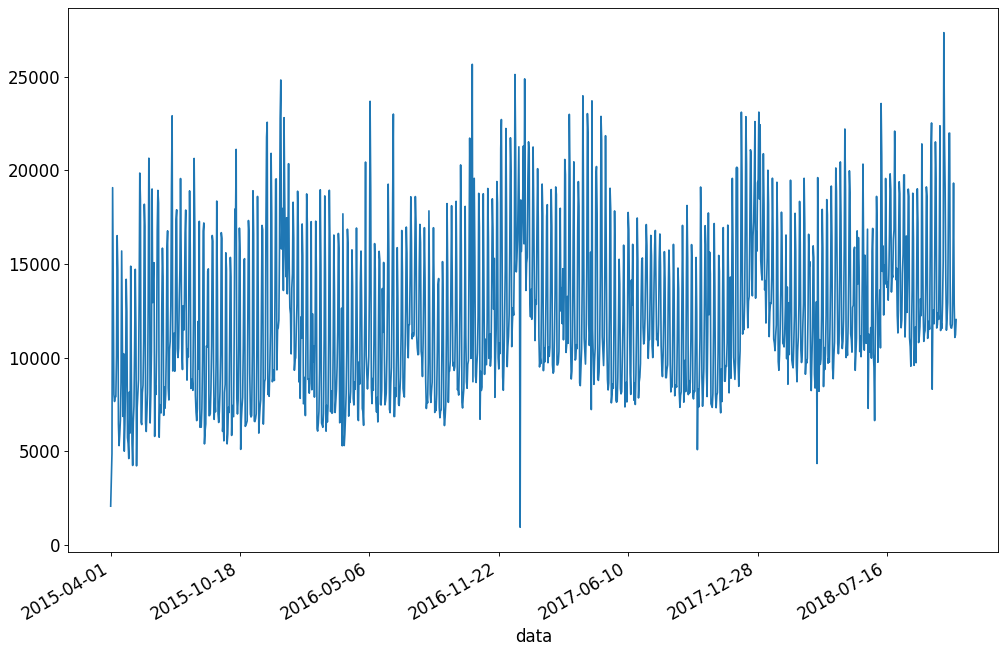

In [69]:
uni_data.plot(subplots=True)

In [70]:
uni_data = uni_data.values

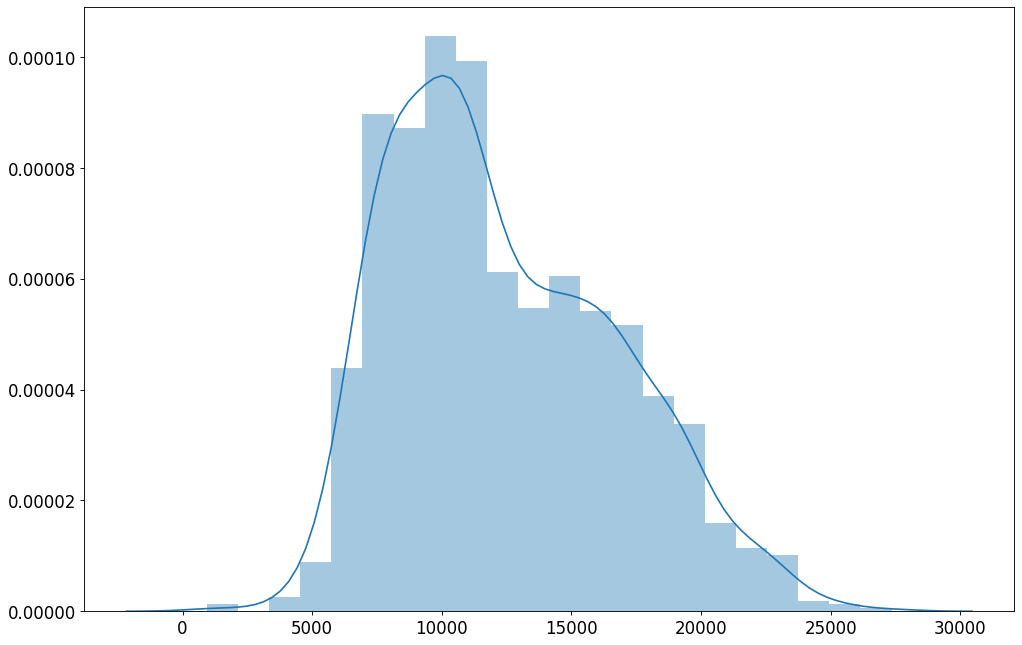

In [71]:
sns.distplot(uni_data)

In [72]:
uni_train_mean = uni_data[:TRAIN_SPLIT].mean()
uni_train_std = uni_data[:TRAIN_SPLIT].std()

In [73]:
uni_data = (uni_data-uni_train_mean)/uni_train_std

In [74]:
univariate_past_history = 20
univariate_future_target = 0

x_train_uni, y_train_uni = univariate_data(uni_data, 0, TRAIN_SPLIT,
                                           univariate_past_history, 
                                           univariate_future_target)

x_val_uni, y_val_uni = univariate_data(uni_data, TRAIN_SPLIT, None,
                                       univariate_past_history,
                                       univariate_future_target)

In [75]:
print ('Single window of past history')
print (x_train_uni[0])
print ('\n Target temperature to predict')
print (y_train_uni[0])

Single window of past history
[[-2.17331808]
 [-1.85608611]
 [-1.55338047]
 [ 1.57959126]
 [ 0.35311512]
 [-0.85768318]
 [-0.93982915]
 [-0.88278272]
 [-0.88377982]
 [-0.40374273]
 [ 1.01428013]
 [ 0.61595224]
 [-1.20648701]
 [-1.46015611]
 [-1.32660879]
 [-1.16094252]
 [-0.71360455]
 [ 0.83320515]
 [-0.07793616]
 [-1.11526787]]

 Target temperature to predict
-0.3765232501151698


In [76]:
def create_time_steps(length):
    return list(range(-length, 0))

In [77]:
def show_plot(plot_data, delta, title):
    labels = ['History', 'True Future', 'Model Prediction']
    marker = ['8-', 'rx', 'go']
    time_steps = create_time_steps(plot_data[0].shape[0])
    if delta:
        future = delta
    else:
        future = 0

    plt.title(title)
    for i, x in enumerate(plot_data):
        if i:
            plt.plot(future, plot_data[i], marker[i], markersize=15,
                   label=labels[i])
        else:
            plt.plot(time_steps, plot_data[i].flatten(), marker[i], label=labels[i])
        plt.legend()
        plt.xlim([time_steps[0], (future+5)*2])
        plt.xlabel('Time-Step')
    return plt

<module 'matplotlib.pyplot' from '/home/personal-arthur/.local/lib/python3.6/site-packages/matplotlib/pyplot.py'>

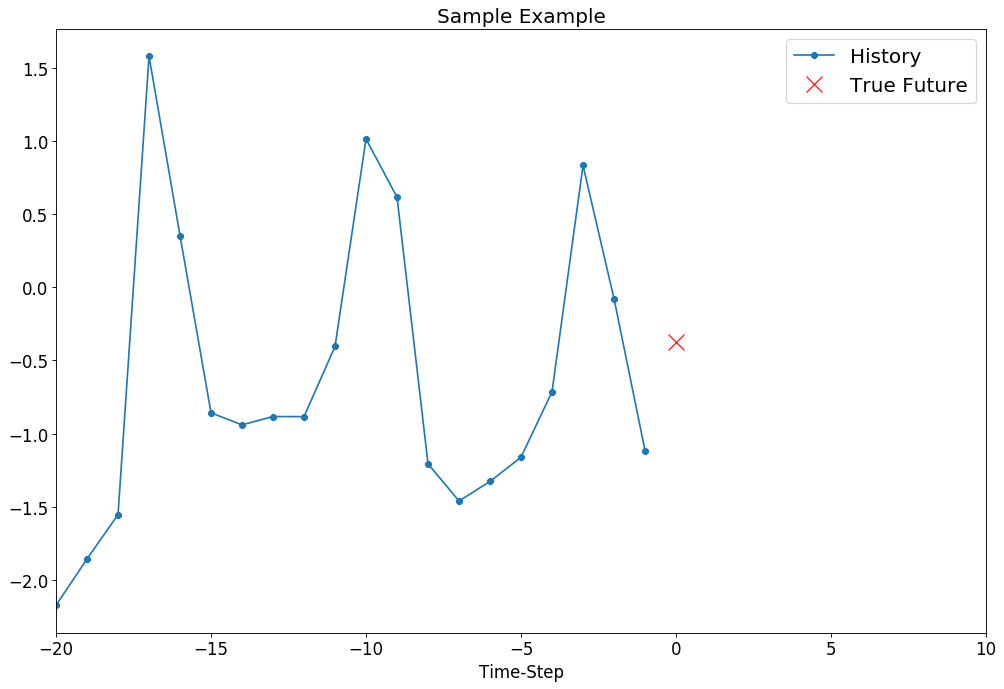

In [78]:
show_plot([x_train_uni[0], y_train_uni[0]], 0, 'Sample Example')

In [79]:
def baseline(history):
    return np.mean(history)

<module 'matplotlib.pyplot' from '/home/personal-arthur/.local/lib/python3.6/site-packages/matplotlib/pyplot.py'>

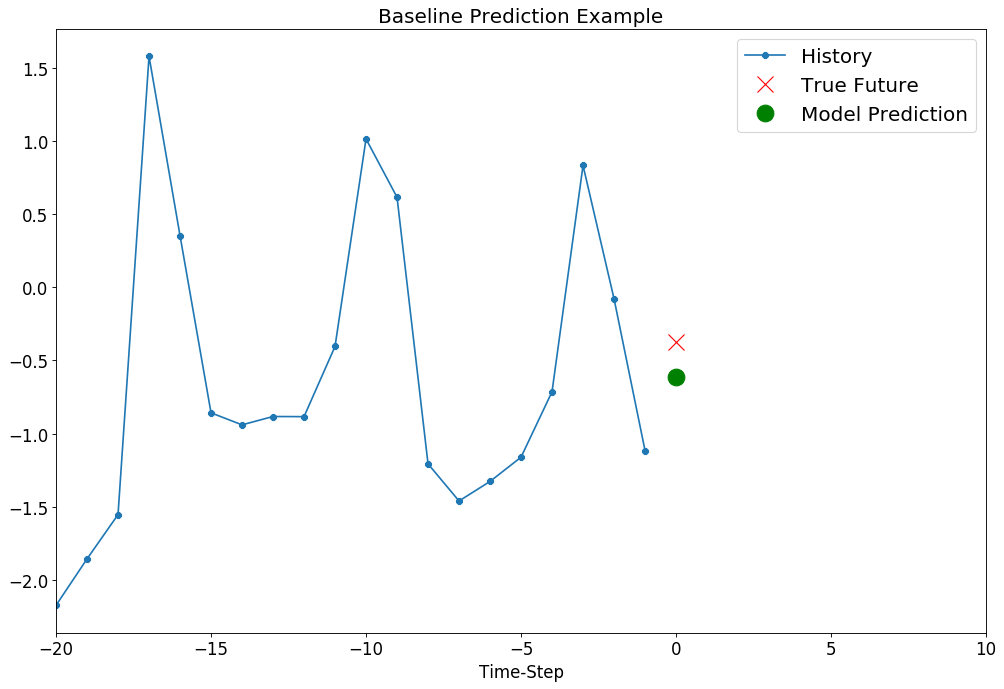

In [80]:
show_plot([x_train_uni[0], y_train_uni[0], baseline(x_train_uni[0])], 0,
           'Baseline Prediction Example')

In [81]:
BATCH_SIZE = 8
BUFFER_SIZE = 80

In [82]:
train_univariate = tf.data.Dataset.from_tensor_slices((x_train_uni, y_train_uni))
train_univariate = train_univariate.cache().shuffle(BUFFER_SIZE).batch(BATCH_SIZE).repeat()

val_univariate = tf.data.Dataset.from_tensor_slices((x_val_uni, y_val_uni))
val_univariate = val_univariate.batch(BATCH_SIZE).repeat()

In [83]:
simple_lstm_model = tf.keras.models.Sequential([
    tf.keras.layers.LSTM(8, input_shape = x_train_uni.shape[-2:]),
    tf.keras.layers.Dense(8),
    tf.keras.layers.Dropout(.05),
    tf.keras.layers.Dense(4),
    tf.keras.layers.Dense(1)
])

simple_lstm_model.compile(optimizer='adam', loss='mse', 
                          metrics = ['RootMeanSquaredError'])

In [84]:
EVALUATION_INTERVAL = 100
EPOCHS = 20

single_step_history = simple_lstm_model.fit(train_univariate, epochs=EPOCHS,
                      steps_per_epoch=EVALUATION_INTERVAL,
                      validation_data=val_univariate, validation_steps=50)

Train for 100 steps, validate for 50 steps
Epoch 1/20
100/100 [==============================] - 3s 33ms/step - loss: 0.9636 - RootMeanSquaredError: 0.9823 - val_loss: 0.6674 - val_RootMeanSquaredError: 0.8169
Epoch 2/20
100/100 [==============================] - 1s 10ms/step - loss: 0.9128 - RootMeanSquaredError: 0.9553 - val_loss: 0.6042 - val_RootMeanSquaredError: 0.7773
Epoch 3/20
100/100 [==============================] - 1s 10ms/step - loss: 0.8725 - RootMeanSquaredError: 0.9329 - val_loss: 0.5377 - val_RootMeanSquaredError: 0.7333
Epoch 4/20
100/100 [==============================] - 1s 10ms/step - loss: 0.6866 - RootMeanSquaredError: 0.8299 - val_loss: 0.3676 - val_RootMeanSquaredError: 0.6063
Epoch 5/20
100/100 [==============================] - 1s 10ms/step - loss: 0.4968 - RootMeanSquaredError: 0.7060 - val_loss: 0.3160 - val_RootMeanSquaredError: 0.5622
Epoch 6/20
100/100 [==============================] - 1s 10ms/step - loss: 0.4408 - RootMeanSquaredError: 0.6643 - val_los

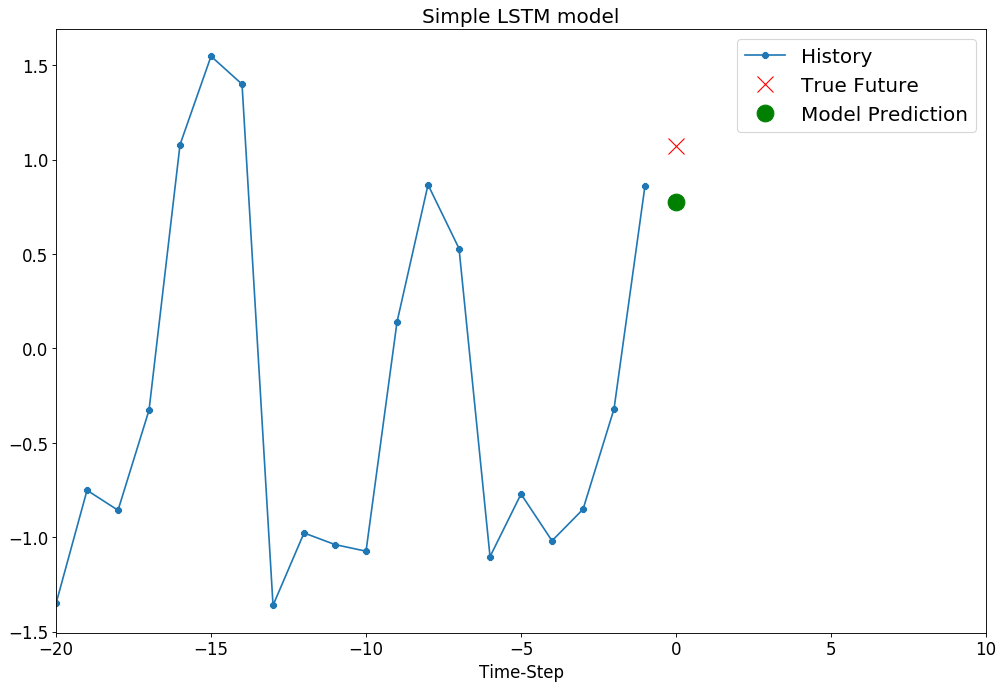

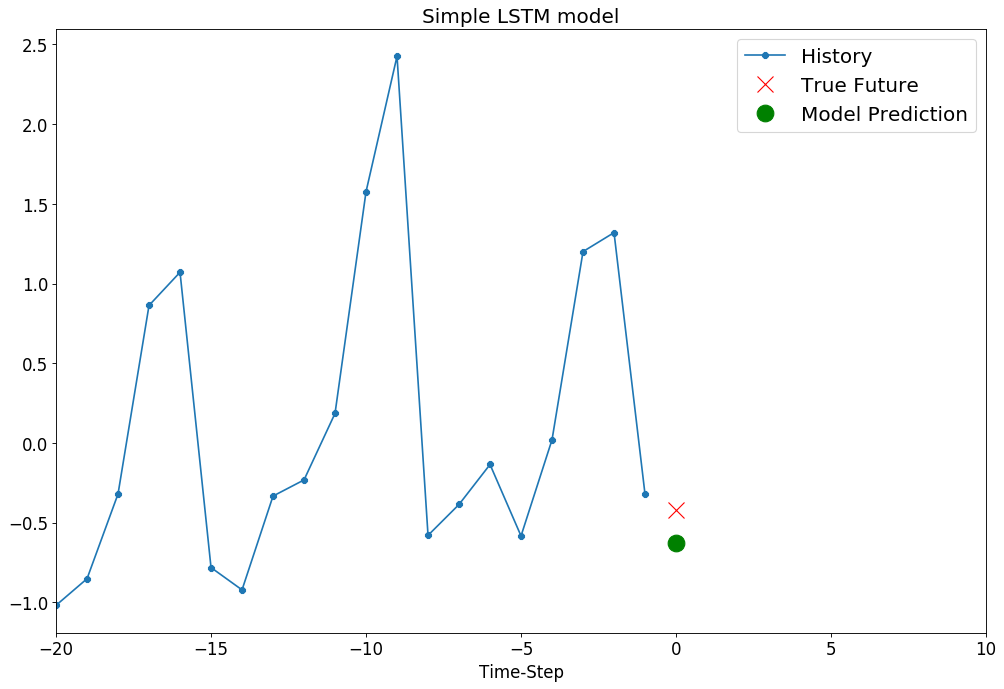

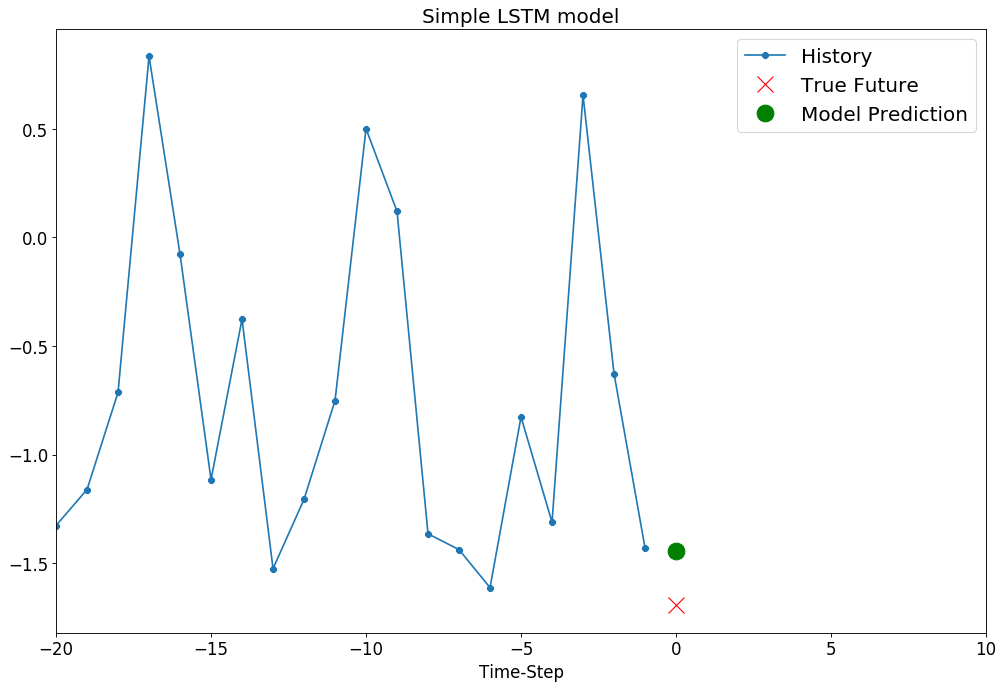

In [85]:
for x, y in train_univariate.take(3):
    plot = show_plot([x[0].numpy(), y[0].numpy(),
                simple_lstm_model.predict(x)[0]], 0, 'Simple LSTM model')
    plot.show()

In [86]:
train_univariate

<RepeatDataset shapes: ((None, 20, 1), (None,)), types: (tf.float64, tf.float64)>

In [87]:
def plot_train_history(history, title):
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs = range(len(loss))

    plt.figure()

    plt.plot(epochs, loss, 'b', label='Training loss')
    plt.plot(epochs, val_loss, 'r', label='Validation loss')
    plt.title(title)
    plt.legend()

    plt.show()

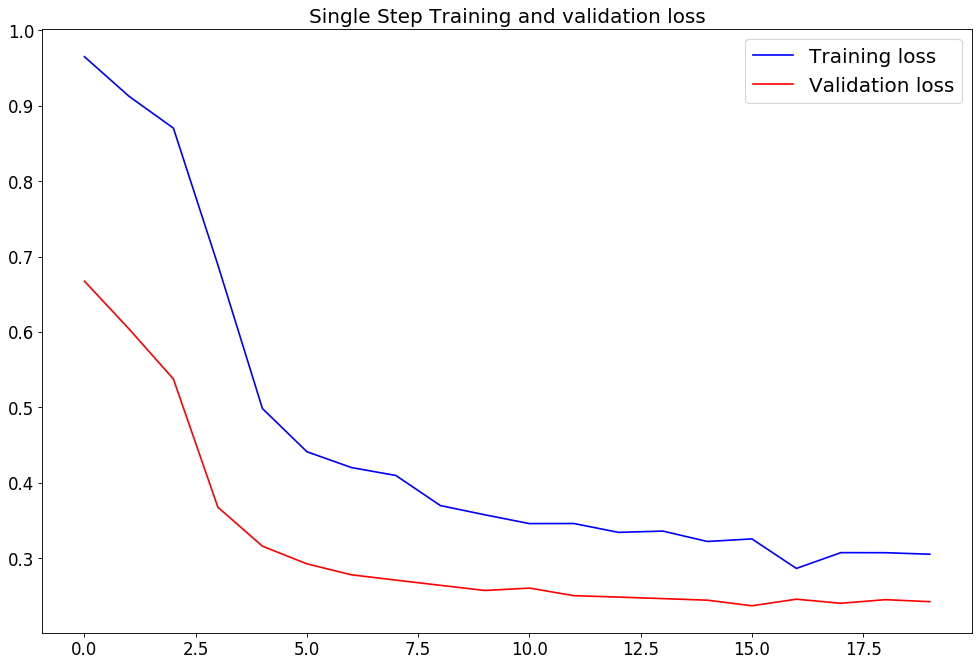

In [88]:
plot_train_history(single_step_history,
                   'Single Step Training and validation loss')

In [89]:
list(x_train_uni[0])

[array([-2.17331808]),
 array([-1.85608611]),
 array([-1.55338047]),
 array([1.57959126]),
 array([0.35311512]),
 array([-0.85768318]),
 array([-0.93982915]),
 array([-0.88278272]),
 array([-0.88377982]),
 array([-0.40374273]),
 array([1.01428013]),
 array([0.61595224]),
 array([-1.20648701]),
 array([-1.46015611]),
 array([-1.32660879]),
 array([-1.16094252]),
 array([-0.71360455]),
 array([0.83320515]),
 array([-0.07793616]),
 array([-1.11526787])]

In [90]:
x

<tf.Tensor: shape=(8, 20, 1), dtype=float64, numpy=
array([[[-1.32660879],
        [-1.16094252],
        [-0.71360455],
        [ 0.83320515],
        [-0.07793616],
        [-1.11526787],
        [-0.37652325],
        [-1.52511315],
        [-1.20611861],
        [-0.75141931],
        [ 0.49958723],
        [ 0.11878137],
        [-1.36474121],
        [-1.43750298],
        [-1.61235271],
        [-0.82706429],
        [-1.311467  ],
        [ 0.65390157],
        [-0.62743047],
        [-1.42965855]],

       [[-1.18377653],
        [-1.2120615 ],
        [-0.83848902],
        [-0.7470162 ],
        [-0.23255933],
        [ 1.38426129],
        [ 1.1226154 ],
        [-1.19290705],
        [-1.29348833],
        [-1.06437611],
        [-0.83384104],
        [ 0.21604487],
        [ 1.92644722],
        [ 1.4128198 ],
        [-1.19251659],
        [-0.87602583],
        [-0.35492899],
        [ 1.56392004],
        [ 0.22596953],
        [ 0.61843616]],

       [[ 1.57959126],
 

#### use this docmentation https://www.tensorflow.org/tutorials/structured_data/time_series